In [1]:
# TO link colab with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset from an Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/MinneMUDAC2025/new_novice.csv'

try:
    # If your file has multiple sheets, you can specify the sheet with sheet_name parameter (e.g., sheet_name=0 or sheet_name='Sheet1')
    df = pd.read_csv(file_path)
except Exception as e:
    error = str(e)

# Display the result
if 'df' in locals():
    data_head = df.head()
else:
    data_head = error

cols = data_head.columns.tolist()
for col in cols:
  print(col)


Unnamed: 0
Match ID 18Char
Stage
Little ID
Big ID
Big County
Big Age
Big Occupation
Big: Military
Big Approved Date
Big Level of Education
Big Languages
Big Gender
Big Birthdate
Big Employer
Program
Program Type
Big Race/Ethnicity
Closure Reason
Closure Details
Match Activation Date
Match Closure Meeting Date
Rationale for Match
Big Enrollment: Record Type
Big Assessment Uploaded
Big Acceptance Date
Big Car Access
Big Days Acceptance to Match
Big Days Interview to Acceptance
Big Days Interview to Match
Big Open to Cross-Gender Match
Big Re-Enroll
Big Contact: Preferred Communication Type
Big Contact: Former Big/Little
Big Contact: Interest Finder - Sports
Big Contact: Interest Finder - Places To Go
Big Contact: Interest Finder - Hobbies
Big Contact: Interest Finder - Entertainment
Big Contact: Created Date
Big Enrollment: Created Date
Big Contact: Volunteer Availability
Big Contact: Marital Status
Little RTBM Date in MF
Little RTBM in Matchforce
Little Moved to RTBM in MF
Little Applic

In [23]:
columns_of_interest = [
    'Stage', 'closure_reason_grp', 'Match Length',
    'age_gap_over_10', 'hobbies', 'race_match',
    'match_period', 'Match Activation Date', 'Program Type'
    ]
df_subdata = df[columns_of_interest]

print(df_subdata.head().to_markdown())
print(df_subdata.shape)
df_subset = df_subdata.dropna(subset=columns_of_interest)
print(df_subset.shape)
print(df_subset.dtypes)

|    | Stage   | closure_reason_grp   |   Match Length | age_gap_over_10   |   hobbies | race_match   | match_period   | Match Activation Date   | Program Type   |
|---:|:--------|:---------------------|---------------:|:------------------|----------:|:-------------|:---------------|:------------------------|:---------------|
|  0 | Closed  | Lack of availability |            9   | True              |       nan | True         | pre-covid      | 2017-03-03              | Community      |
|  1 | Closed  | Incompatibility      |           46.1 | True              |         1 | True         | pre-covid      | 2018-04-12              | Community      |
|  2 | Closed  | Lack of availability |            6.2 | True              |       nan | False        | pre-covid      | 2017-03-23              | Community      |
|  3 | Active  | nan                  |           85.6 | True              |         2 | True         | pre-covid      | 2018-01-11              | Community      |
|  4 | Closed  |

In [4]:
# print(df_subset['Big Contact: Interest Finder - Hobbies'].to_markdown())

In [25]:
import pandas as pd
import numpy as np

# Clean Data

stage_binary = {
    'Active': 0,
    'Pending Closure':1,
    'Closed': 1
}

# Future analysis shows non-(fe)male genders are too little in count, causing high variance and thus not good for Cox regression
gender_binary = {
    'Female': 0,
    'Male': 1,
    'Genderqueer/Nonbinary': 'Unknown',
    'Prefer not to say': 'Unknown',
    'Trans Female' : 'Unknown',
    'Trans Male': 'Unknown'
}

county_corrections = {
    "Hennepin County": "Hennepin",
    "Henepin": "Hennepin",
    "Hennpin": "Hennepin",
    "Ramesy": "Ramsey",
    "Rice County": "Rice",
    "St. Croix County, WI": "St. Croix",
    "St. Croix County": "St. Croix",
    "LeSeuer": "Le Sueur",
    "MN": "Minnesota",
    "mn": "Minnesota",
    "New Castle County": "New Castle",
    "US": "United States",
    "United States of America": "United States"
}

not_counties = {
    "Testing County": "Unknown",
    "Minnesota": "Unknown",
    "Outside state": "Unknown",
    "United States": "Unknown",
    "California": "Unknown",
    "Other": "Unknown"
}

binary_category_corrections = {
    'No': 0,
    'Yes': 1,
}

program_type_correction = {
    'Community': 0,
    'Site': 1,
    'Site Based Facilitated':1,
    'Site Based Plus': 1
}

period_correction = {
    'covid' : 1,
    'post-covid' : 0,
    'pre-covid': 0
}

boolean_corrections = {
    'True': 1,
    'False': 0
}

for var in columns_of_interest:
    match var:
        case "Stage":
            df_subset.loc[:, var] = pd.to_numeric(df_subset[var].fillna("Unknown").infer_objects(copy=False).replace(stage_binary)).astype(int)
        case "age_gap_over_10":
            df_subset.loc[:, var] = pd.to_numeric(df_subset[var].fillna("Unknown").infer_objects(copy=False).replace(boolean_corrections)).astype(int)
        case "race_match":
            df_subset.loc[:, var] = pd.to_numeric(df_subset[var].fillna("Unknown").infer_objects(copy=False).replace(boolean_corrections)).astype(int)
        case "Program Type":
            df_subset.loc[:, var] = pd.to_numeric(df_subset[var].fillna("Unknown").infer_objects(copy=False).replace(program_type_correction)).astype(int)
        case "match_period":
            df_subset.loc[:, var] = pd.to_numeric(df_subset[var].fillna("Unknown").infer_objects(copy=False).replace(period_correction)).astype(int)
        case "Match Activation Date":
            df_subset.loc[:, var] = pd.to_datetime(df_subset[var], errors='coerce')
        case _:
            # df_subset.loc[:, var] = df_subset[var].replace('', np.nan).infer_objects(copy=False).fillna("Unknown")
            print(var)

    uniques = df_subset[var].dropna()
    try:
      uniques = uniques.unique()
      uniques = np.sort(uniques)
    except: pass
    print(uniques)
    print()


    # df_subset = df_subset[df_subset["Big Gender"] != 'Unknown']
    # df_subset = df_subset[df_subset["Little Gender"] != 'Unknown']

    # print(df_subset['Big Open to Cross-Gender Match'].value_counts())





[0 1]

closure_reason_grp
['Incompatibility' 'Lack of availability' 'Scheduled termination'
 'Unfit for participation']

Match Length
[ 0.   0.2  0.3  0.5  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.5  1.6  1.7
  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1
  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5
  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3
  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7
  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1
 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5
 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9
 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1 14.2 14.3
 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4 15.5 15.6 15.7
 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9 17.  17.1
 17.2 17.3 17.

<ipython-input-25-8ee9ff70815c>:73: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_subset.loc[:, var] = pd.to_numeric(df_subset[var].fillna("Unknown").infer_objects(copy=False).replace(stage_binary)).astype(int)
<ipython-input-25-8ee9ff70815c>:77: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_subset.loc[:, var] = pd.to_numeric(df_subset[var].fillna("Unknown").infer_objects(copy=False).replace(boolean_corrections)).astype(int)
<ipython-input-25-8ee9ff70815c>:81: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated a

In [27]:
# Customized modifications for special entries columns:
# Multiple entries 'Big Languages', 'Big Race/Ethnicity', 'Little Participant: Race/Ethnicity',

subcategory_delimiter = " >> "

# Special one-hot encoding
# Get the df and columns whose entries are ;-delimited entries.
# Make one-hot encoding schematic for the columns
# Keep relative order of the columns
# replacements = {
#     'column_to_replace_1': {
#         'pos': 3,
#         'new_cols': {
#             'new_col_1': 4,
#             'new_col_2': 5
#         }
#     }, ...
# }
def one_hot_encode_multi_entries_plan(df, columns):
  replacements = {}
  for col in columns:
    replace_data = {}
    # Get list of delimiter-split actual unique elements
    uniques = df_subset[col].unique()
    indvs = []
    for unique in uniques:
      try:
        splitUnique = unique.split(';')
      except:
        splitUnique = [unique]
      for split in splitUnique:
        try:
          split = split.strip()
        except:
          pass
        if split != '': indvs.append(split)
    indvs = (list(set(indvs)))

    # New columns
    col_position = df.columns.get_loc(col)
    replace_data['pos'] = col_position
    newCols = {}
    curNewPos = col_position + 1
    for indv in indvs:
      newCol = f"{col}{subcategory_delimiter}{indv}"
      newCols[newCol] = curNewPos
      curNewPos += 1
    replace_data['new_cols'] = newCols
    replacements[col] = replace_data
  return replacements

def reconstruct_multi_entries_dataframe(df, replacements):
    # List to hold the final column order
    final_columns = []

    # Iterate over the original DataFrame's columns
    for col in df.columns:
        if col in replacements:
          # Insert dummy columns at the end of the df and at the right place in final_columns order
          dummy_cols = list(replacements[col]['new_cols'].keys())
          final_columns.extend(dummy_cols)
          try:
              # print(col)
              dummies = df[col].str.get_dummies(sep=';')
          except:
              dummies = df[col].get_dummies()
          original_dummy_columns = dummies.columns.tolist()
          rename_dict = dict(zip(original_dummy_columns, dummy_cols))
          dummies.rename(columns=rename_dict, inplace=True)
          df = pd.concat([df.drop(col, axis=1), dummies], axis=1)

        elif not any(col in rep['new_cols'] for rep in replacements.values()):
          # Add the column if it's not a newly created dummy column
          final_columns.append(col)

    # Reorder the DataFrame based on the final_columns list
    df = df[final_columns]
    return df

multi_entries_replacements = one_hot_encode_multi_entries_plan(df_subset, [])
df_multi_encoded = reconstruct_multi_entries_dataframe(df_subset, multi_entries_replacements)
print(df_multi_encoded.head().to_markdown())


|    |   Stage | closure_reason_grp    |   Match Length |   age_gap_over_10 |   hobbies |   race_match |   match_period | Match Activation Date   |   Program Type |
|---:|--------:|:----------------------|---------------:|------------------:|----------:|-------------:|---------------:|:------------------------|---------------:|
|  1 |       1 | Incompatibility       |           46.1 |                 1 |         1 |            1 |              0 | 2018-04-12 00:00:00     |              0 |
|  4 |       1 | Lack of availability  |           28.3 |                 0 |         0 |            0 |              0 | 2018-04-13 00:00:00     |              0 |
|  5 |       1 | Incompatibility       |           13.1 |                 1 |         1 |            0 |              0 | 2018-03-19 00:00:00     |              0 |
|  6 |       1 | Scheduled termination |           71   |                 1 |         1 |            1 |              0 | 2018-07-28 00:00:00     |              0 |
|  8 |    

In [28]:
# Customized modifications for special entries columns:
# Time: 'Match Activation Date'

import pandas as pd
from dateutil.relativedelta import relativedelta
from datetime import datetime

df_multi_n_time_encoded = df_multi_encoded.copy()
final_columns = df_multi_n_time_encoded.columns.tolist()
temp_columns = []
col = "Match Activation Date"
uTime_colName = "Months Until Now"

# Get col location
col_position = df_multi_n_time_encoded.columns.get_loc(col)
temp_columns += final_columns[:col_position]

# Convert to datetime
df_multi_n_time_encoded[col] = pd.to_datetime(df_multi_n_time_encoded[col])

# Calculate months until the current date
current_date = datetime.now()
df_multi_n_time_encoded[uTime_colName] = df_multi_n_time_encoded[col].apply(lambda x: relativedelta(current_date, x).years * 12 + relativedelta(current_date, x).months)

temp_columns.append(uTime_colName)

final_columns = temp_columns + final_columns[col_position + 1:]

df_multi_n_time_encoded = df_multi_n_time_encoded[final_columns]
print(df_multi_n_time_encoded.head().to_markdown())

|    |   Stage | closure_reason_grp    |   Match Length |   age_gap_over_10 |   hobbies |   race_match |   match_period |   Months Until Now |   Program Type |
|---:|--------:|:----------------------|---------------:|------------------:|----------:|-------------:|---------------:|-------------------:|---------------:|
|  1 |       1 | Incompatibility       |           46.1 |                 1 |         1 |            1 |              0 |                 83 |              0 |
|  4 |       1 | Lack of availability  |           28.3 |                 0 |         0 |            0 |              0 |                 83 |              0 |
|  5 |       1 | Incompatibility       |           13.1 |                 1 |         1 |            0 |              0 |                 84 |              0 |
|  6 |       1 | Scheduled termination |           71   |                 1 |         1 |            1 |              0 |                 80 |              0 |
|  8 |       1 | Scheduled termination |

In [29]:
# Apply normal one-hot encodings (No more in new version)
import pandas as pd

df_encoded = pd.DataFrame(df_multi_n_time_encoded.copy())
# df_encoded = pd.get_dummies(df_encoded, prefix_sep=" >> ", dtype=int, columns=['Program Type'])

print(df_encoded.head().to_markdown())

|    |   Stage | closure_reason_grp    |   Match Length |   age_gap_over_10 |   hobbies |   race_match |   match_period |   Months Until Now |   Program Type |
|---:|--------:|:----------------------|---------------:|------------------:|----------:|-------------:|---------------:|-------------------:|---------------:|
|  1 |       1 | Incompatibility       |           46.1 |                 1 |         1 |            1 |              0 |                 83 |              0 |
|  4 |       1 | Lack of availability  |           28.3 |                 0 |         0 |            0 |              0 |                 83 |              0 |
|  5 |       1 | Incompatibility       |           13.1 |                 1 |         1 |            0 |              0 |                 84 |              0 |
|  6 |       1 | Scheduled termination |           71   |                 1 |         1 |            1 |              0 |                 80 |              0 |
|  8 |       1 | Scheduled termination |

In [30]:
# Drop low count one-hot columns with super low number of 1's, since that means super loww variance, and thus the Cox model way down below will consider them to perfectly indicate event occurences (match closing)
max_count_low_variance = 48 # Highest number of 1's in the df that caused Cox to crash down below
low_count_columns = [col for col in df_encoded.columns if df_encoded[col].dtype in ['int64', 'float64'] and df_encoded[col].sum() <= max_count_low_variance]

df_low_count = df_encoded[low_count_columns]

print("Count too low")
print(df_low_count.columns)

df_high_count = df_encoded.drop(columns=low_count_columns, axis=1)

print("==")
for col in df_high_count.columns:
  if (df_encoded[col].dtype == 'int64' or df_encoded[col].dtype == 'float64') and df_encoded[col].sum() < 5:
    print(col, df_encoded[col].sum())

Count too low
Index([], dtype='object')
==


In [ ]:
# print(list(df_high_count.columns))
# print(df_high_count['Big Age'].dtype)
# print((df_high_count.dtypes.to_markdown()))

In [31]:
categorical_cols = {
    'one-hot': {},
    'normal': {}
}
numerical_cols = []
target_col = ['closure_reason_grp', 'Match Length']


df_high_count = df_encoded # Remove line to remove low variance
for col in df_high_count.columns:
  # print(col)
  if col in target_col:
    continue
  if subcategory_delimiter in col or df_high_count[col].dtype == 'object':
    if subcategory_delimiter in col:
      col_data = col.split(subcategory_delimiter)
      if col_data[1] != 'Unknown':
        categorical_cols['one-hot'][col_data[0]] = categorical_cols['one-hot'].get(col_data[0], []) + ([col_data[1]])
    else:
      categorical_cols['normal'][col] = list(df_high_count[col].unique())
  else:
    numerical_cols.append(col)

for cat in categorical_cols['one-hot']:
  print(cat, categorical_cols['one-hot'][cat])
  print()
print(categorical_cols['normal'])
print()
print(numerical_cols)

{'Stage': [1, 0], 'race_match': [1, 0], 'match_period': [0, 1], 'Program Type': [0, 1]}

['age_gap_over_10', 'hobbies', 'Months Until Now']


In [32]:
# Set the style of seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of
sns.set(style="whitegrid")

# Iterate over each category and its values
dem_cats = categorical_cols['one-hot']
for cat, vals in dem_cats.items():
    plt.figure(figsize=(50, 6))
    plt.title(f"Match Length for {cat}")
    plt.xlabel("Match Lengths")
    plt.ylabel("Counts")

    # Plot each one-hot encoded column within the category
    for val in vals:
        if val == 'Unknown':
            continue
        col_name = f"{cat}{subcategory_delimiter}{val}"
        if col_name in df_high_count.columns:
            df_ingroup = df_high_count[df_high_count[col_name] == 1]
            # Calculate the frequency of each unique Match Length value
            match_length_counts = df_ingroup['Match Length'].value_counts().sort_index()
            sns.lineplot(x=match_length_counts.index, y=match_length_counts.values, label=f"{val} - {len(df_ingroup)} matches")

    plt.legend(title=cat)
    plt.show()


In [33]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 6.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=c2dc30422246f8efafe2824db0c4700e2630838d0dd6dd3e5af3f001eba5b4a8
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


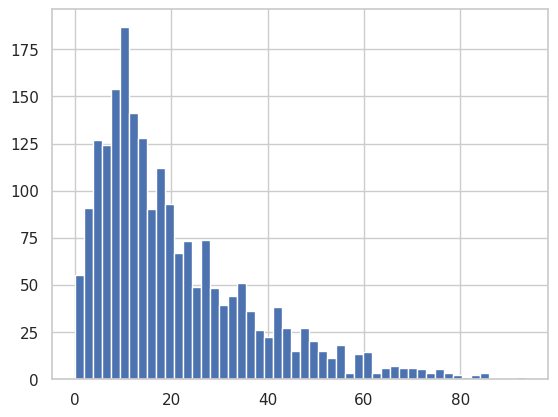

In [34]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# print(df_high_count.shape)
# print(df_high_count.dtypes)
# print(df_high_count.isnull().sum().to_markdown())

T = df_high_count["Match Length"]
E = df_high_count["Stage"]
plt.hist(T, bins = 50)
plt.show()


In [35]:
print(df_high_count.dtypes.to_markdown())

|                    | 0       |
|:-------------------|:--------|
| Stage              | object  |
| closure_reason_grp | object  |
| Match Length       | float64 |
| age_gap_over_10    | int64   |
| hobbies            | float64 |
| race_match         | object  |
| match_period       | object  |
| Months Until Now   | int64   |
| Program Type       | object  |


/usr/local/lib/python3.11/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<Axes: xlabel='timeline'>

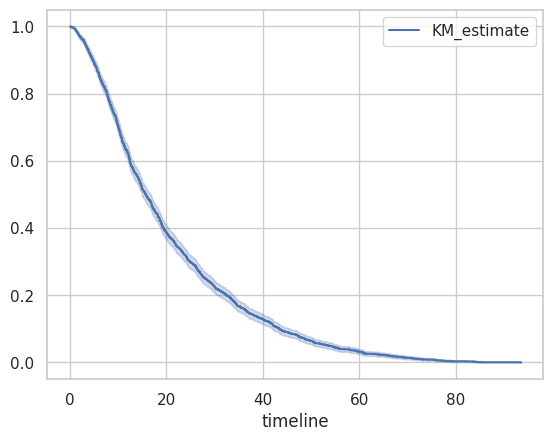

In [36]:
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()

In [37]:
from lifelines.utils import median_survival_times
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

15.7
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    14.9                    16.7


In [38]:
# Iterate over each category and its values

x_max = df_high_count['Match Length'].max()
for cat, vals in dem_cats.items():

    graphs_needed = len(vals)
    subplot_grid_len = int(np.ceil(graphs_needed ** 0.5))
    plt.figure(figsize=(subplot_grid_len*4, subplot_grid_len*4))
    fig, axes = plt.subplots(subplot_grid_len, subplot_grid_len, figsize=(20, 20))
    fig.suptitle(f"Survival of {cat}")
    # Flatten axes array for easy iteration if it's multidimensional
    axes = axes.flatten() if graphs_needed > 1 else [axes]

    # Plot each one-hot encoded column within the category
    for i, val in enumerate(vals):
        ax = axes[i]
        col_name = f"{cat}{subcategory_delimiter}{val}"
        if col_name in df_high_count.columns:
            df_ingroup = df_high_count[df_high_count[col_name] == 1]
            kmf.fit(durations = df_ingroup['Match Length'], event_observed = df_ingroup['Stage'], label = val)
            kmf.plot_survival_function(ax = ax, legend = False)
            ax.set_title(f"{val} ({len(df_ingroup)})")
            ax.set_xlim(0, x_max)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.show()




In [39]:
import pandas as pd

# Consider the "... > Unknown" as the base categories, so remove it to calculate the impact of the other subcategories per demographic category.

# Extract columns where the part after ' >> '(the subcategory_delimiter) is 'Unknown'
unknown_columns = [col for col in df_high_count.columns if col.split(subcategory_delimiter)[-1] == 'Unknown']

# Extract Columns that CoxPHFitter identifies as having way too low variance, thus completely dictates completely determines whether a match closes or not.
too_low_variance_columns = ['Big Contact: Former Big/Little >> Former Little', 'Big Languages >> Somali', 'Little Participant: Race/Ethnicity >> Asian - Chinese', 'Big County >> Isanti', 'Big Level of Education >> Associate Degree']



# Filter the DataFrame to include only these columns
df_unknown = df_high_count[unknown_columns]

# Drop identified columns
df_known = df_high_count.drop(columns=unknown_columns)
# df_known = df_known.drop(columns=too_low_variance_columns)

print(df_known.shape)
print(df_unknown.shape)

(2085, 9)
(2085, 0)


In [ ]:
# print(unknown_columns)
# print(df_known.head().to_markdown())
# print(df_unknown.head().to_markdown())
# print(df_known.columns)
# events = df_known['Stage'].astype(bool)
# print(df_known.loc[events, 'Big County >> Brown'].var())
# print(df_known.loc[~events, 'Big County >> Brown'].var())
# print(len(df_known[df_known['Big Level of Education >> Some High School'] == 1]))

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_known.drop('closure_reason_grp', axis = 1).corr(method='pearson')

# Display the correlation matrix
print(corr_matrix.to_markdown())

|                  |      Stage |   Match Length |   age_gap_over_10 |    hobbies |   race_match |   match_period |   Months Until Now |   Program Type |
|:-----------------|-----------:|---------------:|------------------:|-----------:|-------------:|---------------:|-------------------:|---------------:|
| Stage            |  1         |     -0.0447978 |        -0.0106398 | -0.0160434 |    0.0133067 |     -0.0537473 |          0.0115209 |      0.0142341 |
| Match Length     | -0.0447978 |      1         |         0.118217  |  0.0944116 |    0.0614747 |     -0.019959  |          0.265639  |     -0.233298  |
| age_gap_over_10  | -0.0106398 |      0.118217  |         1         |  0.273012  |   -0.0404889 |      0.1386    |         -0.147084  |     -0.483049  |
| hobbies          | -0.0160434 |      0.0944116 |         0.273012  |  1         |    0.0217522 |      0.306986  |         -0.267616  |     -0.551954  |
| race_match       |  0.0133067 |      0.0614747 |        -0.0404889 |  0.02

In [41]:
# Find columns containing NaN values
cols_with_nan = df_known.columns[df_known.isna().any()].tolist()

# Get the number of rows before removal
initial_row_count = df_known.shape[0]
print(f"Number of rows before removal: {initial_row_count}")

# Drop rows with NaN values
df_cleaned = df_known.dropna()
# df_cleaned = df_cleaned[df_cleaned['Distance'] != 0]

# Get the number of rows after removal
final_row_count = df_cleaned.shape[0]
print(f"Number of rows after removal: {final_row_count}")

# Calculate the number of rows removed
rows_removed = initial_row_count - final_row_count

print(f"Number of rows removed: {rows_removed}")

Number of rows before removal: 2085
Number of rows after removal: 2085
Number of rows removed: 0


In [42]:
# Find columns containing NaN values
cols_with_nan = df_cleaned.columns[df_known.isna().any()].tolist()
cols_with_nan = df_cleaned.columns[df_cleaned.isna().any()].tolist()

print(cols_with_nan)

[]


In [43]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(df_cleaned.dropna().drop(columns=['closure_reason_grp']), duration_col = 'Match Length', event_col = 'Stage')
cph.print_summary()

/usr/local/lib/python3.11/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.CoxPHFitter: fitted with 2085 total observations, 1 right-censored observations>
             duration col = 'Match Length'
                event col = 'Stage'
      baseline estimation = breslow
   number of observations = 2085
number of events observed = 2084
   partial log-likelihood = -13649.00
         time fit was run = 2025-04-03 02:23:59 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
age_gap_over_10  -0.14      0.87      0.06           -0.27           -0.02                0.77                0.98
hobbies          -0.03      0.97      0.02           -0.07            0.02                0.93                1.02
race_match        0.00      1.00      0.05           -0.10            0.10                0.91                1.11
match_period     -0.14      0.87      0.07           -0.27           -0.00                0.76                1.00
Months Until Now -0.02      0.98      0.00           -0.02           -0.02                0.98                0.98
Program Type      0.56      1.75      0.06            0.43            0.69                1.54                1.98

                  cmp to      z      p  -log2(p)
covariate                                       
age_gap_over_10     0.00  -2.31   0.02      5.58
hobbies             0.00  -1.17   0.24      2.05
race_match          0.00   0.04   0.96      0.05
match_period        0.00  -1.97   0.05      4.35
Months Until Now    0.00 -16.45 <0.005    199.65
Program Type        0.00   8.68 <0.005     57.79
---
Concordance = 0.62
Partial AIC = 27310.01
log-likelihood ratio test = 401.47 on 6 df
-log2(p) of ll-ratio test = 275.29

In [44]:
print(df_known.columns)

Index(['Stage', 'closure_reason_grp', 'Match Length', 'age_gap_over_10',
       'hobbies', 'race_match', 'match_period', 'Months Until Now',
       'Program Type'],
      dtype='object')
